In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load dataset

In [13]:
df = pd.read_csv('/content/data.csv')
df

,Calories_Consumed,Weight_Gain
0,500,1.0
1,1000,2.0
2,1500,2.5
3,1750,3.2
4,2100,3.9


In [14]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Calories_Consumed  5 non-null      int64  
 1   Weight_Gain        5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 208.0 bytes


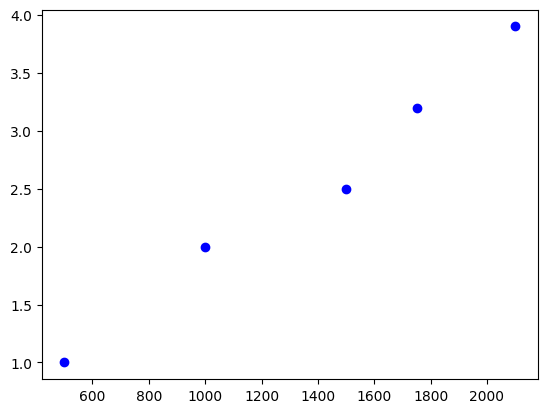

In [15]:
# check linearity assumption of data
plt.scatter(df.Calories_Consumed,df.Weight_Gain,color='blue')

In [39]:
# Input/Independent column
X = df[['Calories_Consumed']]
X

,Calories_Consumed
0,500
1,1000
2,1500
3,1750
4,2100


In [40]:
# Output/Dependent column
y = df[['Weight_Gain']]
y

,Weight_Gain
0,1.0
1,2.0
2,2.5
3,3.2
4,3.9


Training **Phase**

In [41]:
from sklearn.linear_model import LinearRegression

In [43]:
LR = LinearRegression()
LR

LinearRegression()

In [45]:
LR.fit(X,y)

LinearRegression()

In [66]:
# To check score of data
LR.score(X,y)*100

98.21646381816737

Testing **Phase**

In [68]:
df[:5]

,Calories_Consumed,Weight_Gain
0,500,1.0
1,1000,2.0
2,1500,2.5
3,1750,3.2
4,2100,3.9


In [69]:
LR.predict([[1500]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.74741814]])

In [71]:
# create test data
test = [[500],[800],[1350],[2100]]
test

[[500], [800], [1350], [2100]]

In [73]:
# predict weight_gain
y_pred = LR.predict(test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.99804786],
       [1.52285894],
       [2.48501259],
       [3.7970403 ]])

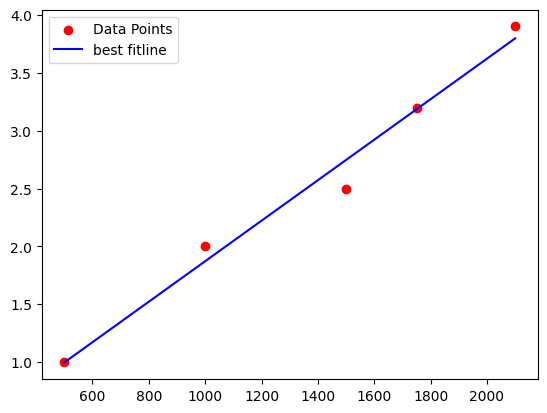

In [74]:
# plot training and testing result
plt.scatter(X,y,color='red',label='Data Points')
plt.plot(test,y_pred,'blue',label='best fitline')
plt.legend()

Measure **the** **performance** **of** **ML** **Model**

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [76]:
# Error = Actual - Predicted

In [79]:
new = df.sample(3)
new

,Calories_Consumed,Weight_Gain
0,500,1.0
3,1750,3.2
4,2100,3.9


In [81]:
# new test input and test output
test_in = new[['Calories_Consumed']]
test_in

,Calories_Consumed
0,500
3,1750
4,2100


In [89]:
test_out = new[['Weight_Gain']]
test_out

,Weight_Gain
0,1.0
3,3.2
4,3.9


In [85]:
# now predict for new data
pred = LR.predict(test_in)
pred

array([[0.99804786],
       [3.18476071],
       [3.7970403 ]])

In [86]:
# Now check error matrics
mean_absolute_error(test_out,pred)

0.040050377833753203

In [87]:
mean_squared_error(test_out,pred)

0.003612248771749493

In [88]:
r2_score(test_out,pred)

0.9976338981844436